## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('galton-stata11.tab', sep='\t')

In [3]:
data.head(10)

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0
5,2,75.5,66.5,M,72.5,4,1.0,0.0
6,2,75.5,66.5,F,65.5,4,0.0,1.0
7,2,75.5,66.5,F,65.5,4,0.0,1.0
8,3,75.0,64.0,M,71.0,2,1.0,0.0
9,3,75.0,64.0,F,68.0,2,0.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 8 columns):
family    898 non-null object
father    898 non-null float64
mother    898 non-null float64
gender    898 non-null object
height    898 non-null float64
kids      898 non-null int64
male      898 non-null float64
female    898 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 56.2+ KB


In [5]:
data.isnull().sum()

family    0
father    0
mother    0
gender    0
height    0
kids      0
male      0
female    0
dtype: int64

In [6]:
data.family.nunique()

197

## Univariate analysis

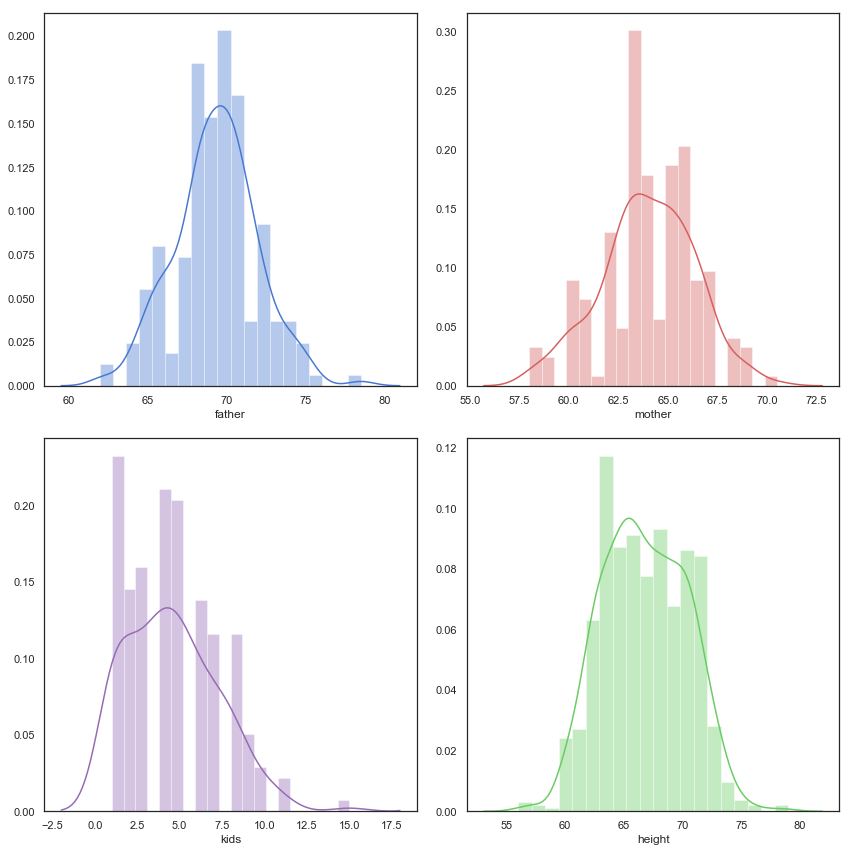

In [7]:
group = data.groupby('family')


sns.set(style="white", palette="muted", color_codes=True)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# plotting distribution of father's height
sns.distplot(group['father'].mean(), bins=20, color = 'b', ax = axes[0,0])

# plotting distribution of mother's height
sns.distplot(group['mother'].mean(), bins=20, color = 'r', ax = axes[0,1])

#plotting distribution of number of kids in each family
sns.distplot(group['kids'].mean(), bins=20, color = 'm', ax = axes[1,0])

#plotting distribution of heights
sns.distplot(data['height'], bins=20, color= 'g', ax = axes[1,1])

plt.tight_layout()

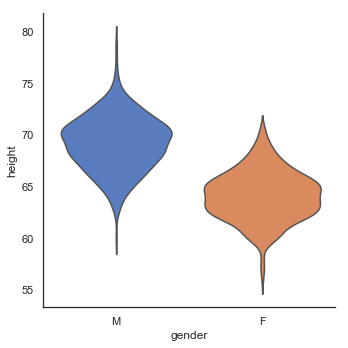

In [8]:
# height plot by sex
g = sns.catplot(x="gender", y="height", kind="violin", inner=None, data=data)

## Pairplot and Correlation plots

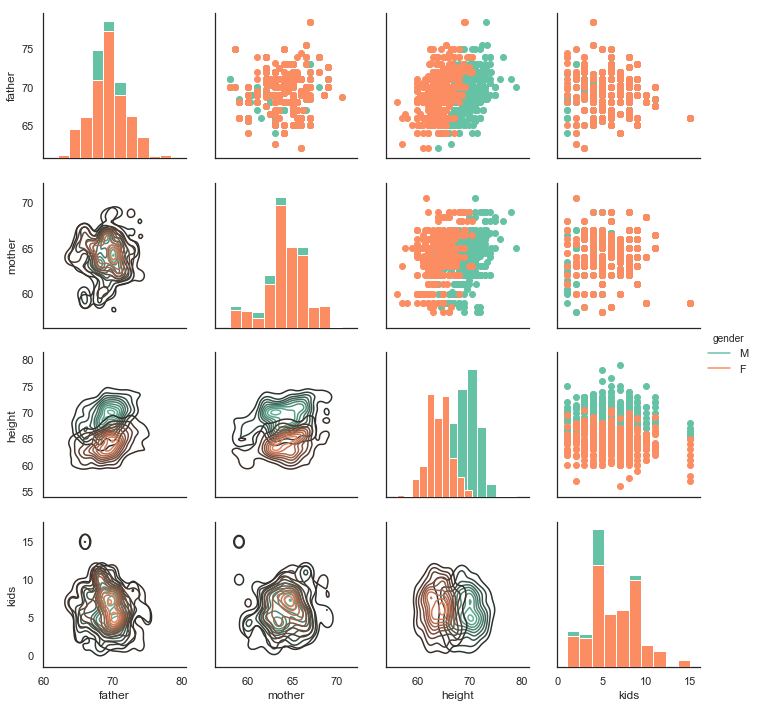

In [9]:
#Add jitter
fig = sns.PairGrid(data[['father', 'mother', 'height', 'kids','gender']], palette='Set2', hue='gender')
fig.map_diag(plt.hist)
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)
fig.add_legend()

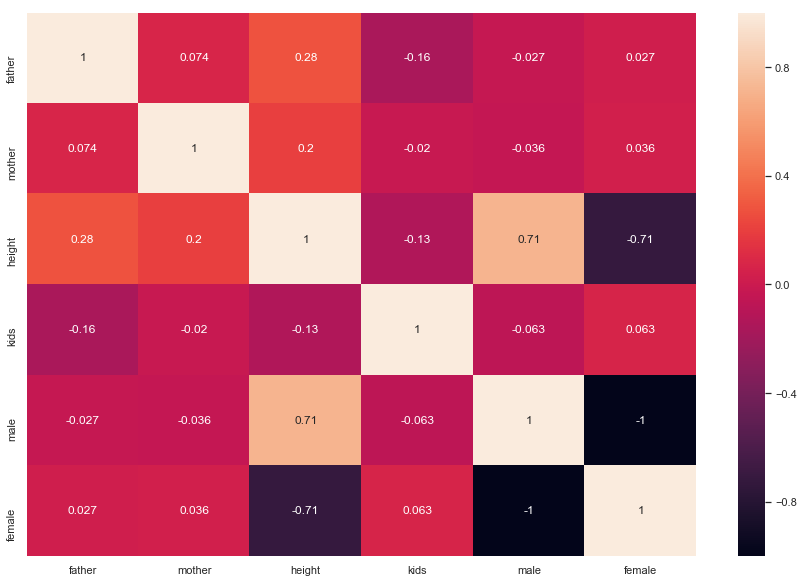

In [10]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

## Adding Features

In [16]:
#adding mid-parent height
data['midparent'] = (data['father'] + data['mother'])/2

#adding product of parents heights
data['parent_product'] = data['father']*data['mother']

#adding gender mapping
data['gender_new'] = data['gender'].map({'M': 1,'F': 0}).astype('category')

In [28]:
data.tail()

,family,father,mother,gender,height,kids,male,female,midparent,parent_product,gender_new
893,136A,68.5,65.0,M,68.5,8,1.0,0.0,66.75,4452.5,1
894,136A,68.5,65.0,M,67.7,8,1.0,0.0,66.75,4452.5,1
895,136A,68.5,65.0,F,64.0,8,0.0,1.0,66.75,4452.5,0
896,136A,68.5,65.0,F,63.5,8,0.0,1.0,66.75,4452.5,0
897,136A,68.5,65.0,F,63.0,8,0.0,1.0,66.75,4452.5,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 11 columns):
family            898 non-null object
father            898 non-null float64
mother            898 non-null float64
gender            898 non-null object
height            898 non-null float64
kids              898 non-null int64
male              898 non-null float64
female            898 non-null float64
midparent         898 non-null float64
parent_product    898 non-null float64
gender_new        898 non-null category
dtypes: category(1), float64(7), int64(1), object(2)
memory usage: 71.2+ KB


In [23]:
data_clean = data[['family','father', 'mother','height','kids','gender_new','midparent','parent_product']].set_index('family')
data_clean.head()

,father,mother,height,kids,gender_new,midparent,parent_product
family,,,,,,,
1,78.5,67.0,73.2,4,1,72.75,5259.50
1,78.5,67.0,69.2,4,0,72.75,5259.50
1,78.5,67.0,69.0,4,0,72.75,5259.50
1,78.5,67.0,69.0,4,0,72.75,5259.50
2,75.5,66.5,73.5,4,1,71.00,5020.75


## Standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[['father', 'mother', 'kids','midparent','parent_product']]), 
                           columns=[['father', 'mother', 'kids','midparent','parent_product']])

In [35]:
data_scaled[['gender_new']] = data[['gender_new']]
data_scaled.head()
height = data['height']
height.head()

0    73.2
1    69.2
2    69.0
3    69.0
4    73.5
Name: height, dtype: float64

lambda = 0.350039


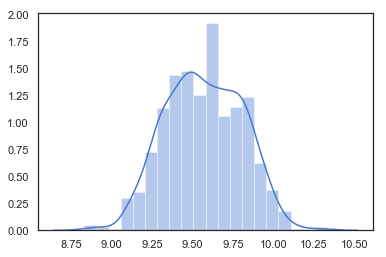

In [37]:
from scipy import stats

height_boxcox, maxlog, interval = stats.boxcox(height, alpha=0.05)
print("lambda = {:g}".format(maxlog))

sns.distplot(height_boxcox)

In [44]:
#using power transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

data_scaled_pt = pd.DataFrame(pt.fit_transform(data[['father', 'mother', 'kids','midparent','parent_product']]), 
                              columns=[['father', 'mother', 'kids','midparent','parent_product']])

In [45]:
data_scaled_pt['gender'] = data[['gender_new']]
data_scaled_pt.head()

,father,mother,kids,midparent,parent_product,gender
0,3.508538,1.309064,-0.764148,3.328478,3.270929,1
1,3.508538,1.309064,-0.764148,3.328478,3.270929,0
2,3.508538,1.309064,-0.764148,3.328478,3.270929,0
3,3.508538,1.309064,-0.764148,3.328478,3.270929,0
4,2.434840,1.064018,-0.764148,2.409461,2.381504,1


# Covariance Matrix and PCA

In [38]:
#covariance matrix
data_scaled.cov()

,father,mother,kids,midparent,parent_product
father,1.001115,0.073747,-0.160201,0.754749,0.730576
mother,0.073747,1.001115,-0.020052,0.711524,0.735929
kids,-0.160201,-0.020052,1.001115,-0.126212,-0.120380
midparent,0.754749,0.711524,-0.126212,1.001115,1.000142
parent_product,0.730576,0.735929,-0.120380,1.000142,1.001115


In [39]:
#Eigen Value decomposition
eig_vals, eig_vecs = np.linalg.eig(data_scaled.cov())

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.23962807e-01 -3.90704313e-01  5.76312048e-01 -5.07541440e-01
  -2.79055169e-01]
 [-4.07415718e-01  4.72442054e-01 -5.43087146e-01 -4.74003906e-01
  -3.01972824e-01]
 [ 1.02981278e-01  7.86948823e-01  6.08360871e-01  2.51416025e-15
  -1.85924465e-03]
 [-5.67448060e-01  3.56354633e-02  4.87496937e-02  7.19529001e-01
  -3.95770511e-01]
 [-5.67155646e-01  5.99191762e-02  2.10069794e-02 -1.01222224e-12
   8.21159468e-01]]

Eigenvalues 
[ 3.09840761e+00  1.05373232e+00  8.52982963e-01 -6.18905127e-16
  4.51238818e-04]


In [163]:
# PCA analysis
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(data_scaled)
X_pca = pca.transform(data_scaled)

pc_df = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6'])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,6.154400,1.177116,-1.222941,-0.549964,-0.085112,1.477768e-15
1,6.166261,1.139772,-1.253950,0.448786,-0.086700,1.417531e-15
2,6.166261,1.139772,-1.253950,0.448786,-0.086700,1.417531e-15
3,6.166261,1.139772,-1.253950,0.448786,-0.086700,1.417531e-15
4,4.403762,0.903091,-0.570051,-0.519088,-0.046031,1.172574e-15


In [164]:
pca.explained_variance_ratio_

array([5.89627566e-01, 2.00713087e-01, 1.62413297e-01, 4.71603098e-02,
       8.57408062e-05, 1.14834901e-31])

<IPython.core.display.Javascript object>


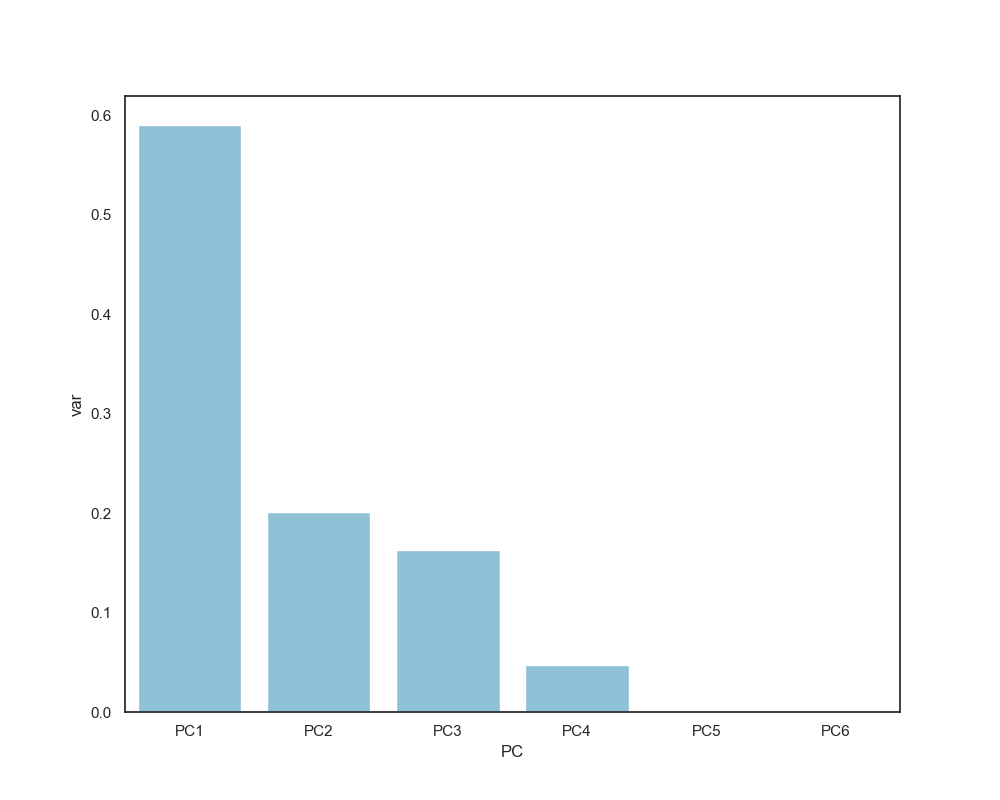

In [167]:
plt.figure(figsize=(10,8))
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c");

<IPython.core.display.Javascript object>


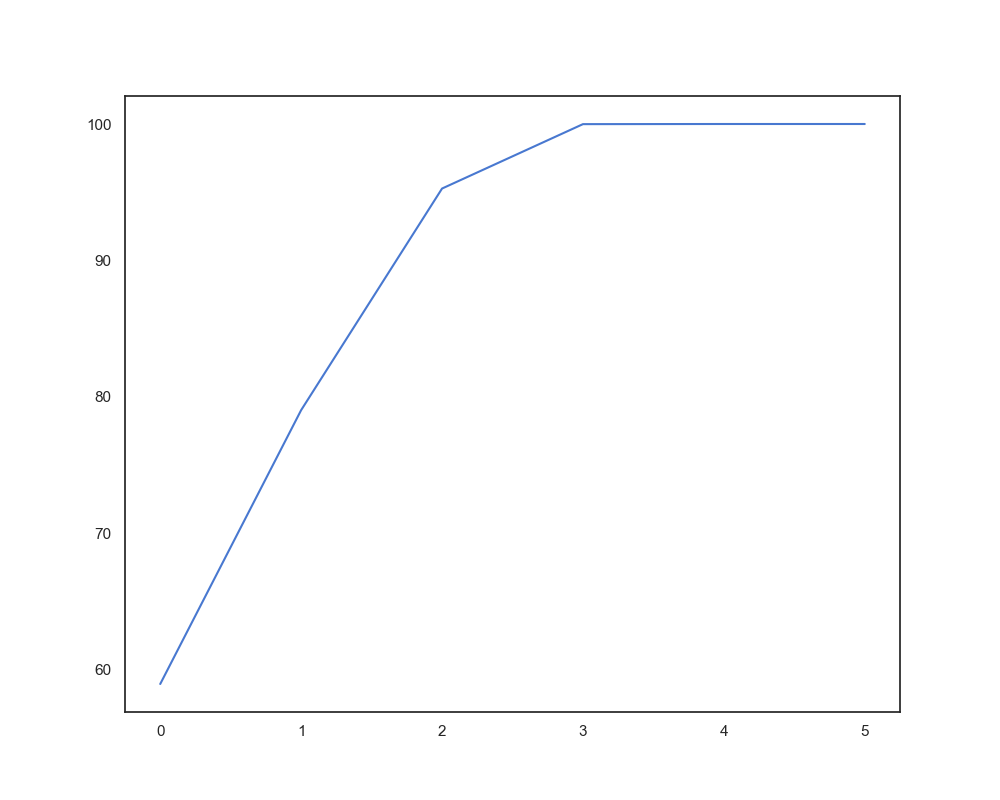

In [166]:
plt.figure(figsize=(10,8))
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [118]:
pc_df['height'] = height
pc_df['gender'] = data_scaled['gender_new']
pc_df.head()

,PC1,PC2,PC3,PC4,height,gender
0,6.154400,1.177116,-1.222941,-0.549964,73.2,1
1,6.166261,1.139772,-1.253950,0.448786,69.2,0
2,6.166261,1.139772,-1.253950,0.448786,69.0,0
3,6.166261,1.139772,-1.253950,0.448786,69.0,0
4,4.403762,0.903091,-0.570051,-0.519088,73.5,1


<IPython.core.display.Javascript object>


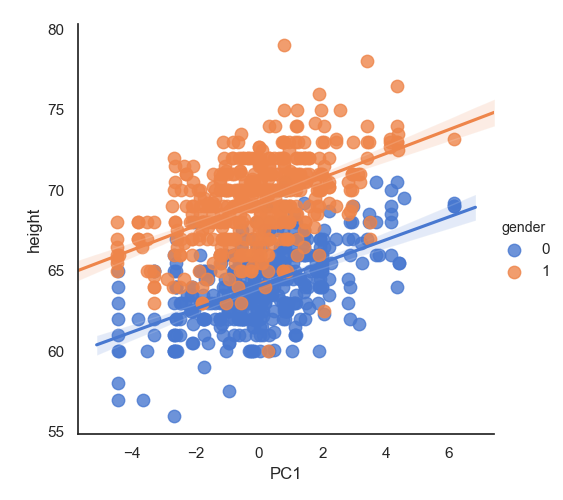

<IPython.core.display.Javascript object>


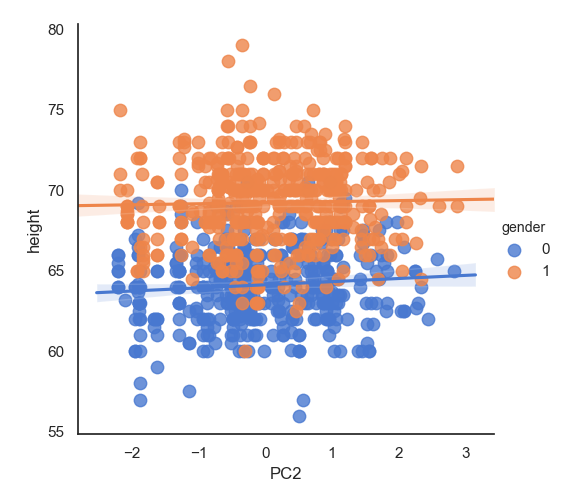

In [122]:
sns.set(style="white", palette="muted", color_codes=True)

sns.lmplot( x="PC1", y="height", hue='gender',
  data=pc_df, 
  fit_reg=True, 
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

sns.lmplot( x="PC2", y="height", hue= 'gender',
  data=pc_df, 
  fit_reg=True, 
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

<IPython.core.display.Javascript object>


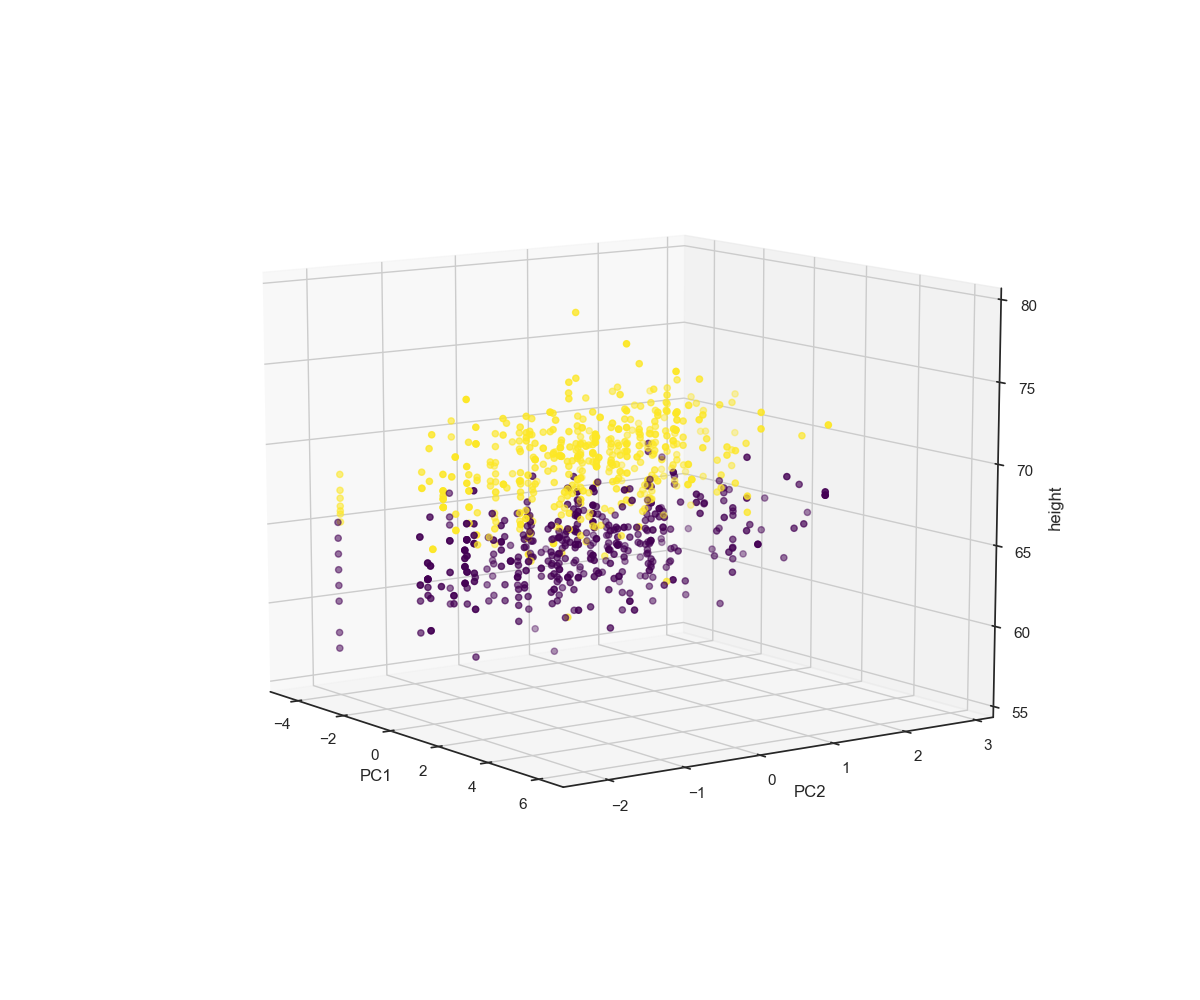

Text(0.5, 0, 'height')

In [123]:
from mpl_toolkits import mplot3d
%matplotlib notebook

plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(pc_df.PC1, pc_df.PC2, pc_df.height, cmap='viridis', c=pc_df.gender)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('height')

## Regression Analysis

### Statsmodels OLS analysis

In [160]:
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

X_father = data_scaled['father']
X_train_f, X_test_f, y_train, y_test = train_test_split(X_father, height, random_state=42)

model_father = OLS(y_train, X_train_f).fit()
y_pred = model_father.predict(X_test_f)

In [161]:
print(model_father.summary())
print(model_father.params)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01191
Date:                Tue, 21 May 2019   Prob (F-statistic):              0.913
Time:                        18:50:49   Log-Likelihood:                -1920.8
No. Observations:                 673   AIC:                             3844.
Df Residuals:                     672   BIC:                             3848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
('father',)    -0.0174      0.160     -0.109      

In [95]:
X_mother = data_scaled['mother']
X_train_m, X_test_m, y_train, y_test = train_test_split(X_mother, height, random_state=42)

model_mother = OLS(y_train, X_train_m).fit()
y_pred = model_mother.predict(X_test_m)

In [96]:
print(model_mother.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09611
Date:                Tue, 21 May 2019   Prob (F-statistic):              0.757
Time:                        17:47:21   Log-Likelihood:                -3783.6
No. Observations:                 673   AIC:                             7569.
Df Residuals:                     672   BIC:                             7574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
('mother',)     0.7778      2.509      0.310      

In [94]:
X_all = data_scaled

X_train, X_test, y_train, y_test = train_test_split(data_scaled, height, random_state=42)

model = OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### SKLearn LinearRegression Analysis

#### Using standard scaled data

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy

height = np.log(height)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, height, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
y_hat = model_lr.predict(X_test)
r2_score(y_test, y_hat)

0.5956418321653345

In [155]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7732845332867957, 5.1595971708991924e-46)

In [107]:
data_scaled.head()

,father,mother,kids,midparent,parent_product,gender_new
0,3.753584,1.264492,-0.795875,3.480713,3.521068,1
1,3.753584,1.264492,-0.795875,3.480713,3.521068,0
2,3.753584,1.264492,-0.795875,3.480713,3.521068,0
3,3.753584,1.264492,-0.795875,3.480713,3.521068,0
4,2.538458,1.047642,-0.795875,2.480733,2.498789,1


In [99]:
model_lr.intercept_, model_lr.coef_

(64.33029282727179,
 array([-4.26590674e+13, -3.98402238e+13, -1.13450334e-01,  6.04767094e+13,
         4.14603930e+00,  5.25709617e+00]))

#### Using power transformed data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled_pt, height, random_state=42)

model_lr_pt = LinearRegression()
model_lr_pt.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
y_hat = model_lr_pt.predict(X_test)
r2_score(y_test, y_hat)

0.601410260237728

In [112]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7770258341965999, 1.0158787101009964e-46)

In [113]:
model_lr_pt.intercept_, model_lr_pt.coef_

(64.07306416710338,
 array([ 1.20505258,  0.58837211, -0.10392403, -4.58011557,  4.51975241,
         5.24910879]))

### Linear Regression analysis on PCA

In [103]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pc_df[['PC1','PC2','PC3','PC4']], height, random_state=42)
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
y_hat = model_pca.predict(X_test_pca)
r2_score(y_test, y_hat)

0.6037408543032183

In [105]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7783446819273864, 5.685563010749835e-47)

In [106]:
model_pca.intercept_, model_pca.coef_

(66.78836420072618,
 array([ 0.66179287,  0.3615304 , -0.01565902, -5.26951478]))

## Random Forests Analysis

In [124]:
from sklearn.ensemble.forest import RandomForestRegressor

rforest = RandomForestRegressor(random_state=42)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, height, random_state=42)

rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [157]:
y_pred = rforest.predict(X_test)
print(rforest.score(X_test, y_test))

0.5462262030046163


In [158]:
rforest.feature_importances_

array([0.08217397, 0.04834296, 0.06110361, 0.06910288, 0.14507522,
       0.59420136])

In [159]:
feature_importances = pd.DataFrame(rforest.feature_importances_ ,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
gender_new,0.594201
parent_product,0.145075
father,0.082174
midparent,0.069103
kids,0.061104
mother,0.048343


## Gradient Boosting 

In [168]:
from sklearn.ensemble import GradientBoostingRegressor

model_boost = GradientBoostingRegressor()

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, height, random_state=42)

model_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [170]:
y_pred = model_boost.predict(X_test)
print(model_boost.score(X_test, y_test))

0.6052109518437223


In [171]:
model_boost.feature_importances_

array([0.07718708, 0.02646819, 0.01825946, 0.04579762, 0.12792226,
       0.7043654 ])

In [172]:
feature_importances = pd.DataFrame(model_boost.feature_importances_ ,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
gender_new,0.704365
parent_product,0.127922
father,0.077187
midparent,0.045798
mother,0.026468
kids,0.018259


## Neural Networks

In [173]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation
from keras.optimizers import SGD, Adam

In [175]:
def reg_model():
    network = keras.models.Sequential()
    layer_1 = Dense(1024, input_dim=6, activation='tanh', name='layer-1')
    layer_2 = Dense(1, name='output-layer')
    network.add(layer_1)
    network.add(Dropout(0.2))
    network.add(layer_2)
    network.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse'])
    return network

model = reg_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer-1 (Dense)              (None, 1024)              7168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
output-layer (Dense)         (None, 1)                 1025      
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


In [176]:
epochs = 100
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
673/673 [==============================] - 3s 4ms/step - loss: 12.2610 - mean_squared_error: 12.2610
Epoch 2/100
673/673 [==============================] - 0s 56us/step - loss: 3.9808 - mean_squared_error: 3.9808
Epoch 3/100
673/673 [==============================] - 0s 56us/step - loss: 1.8099 - mean_squared_error: 1.8099
Epoch 4/100
673/673 [==============================] - 0s 55us/step - loss: 0.9548 - mean_squared_error: 0.9548
Epoch 5/100
673/673 [==============================] - 0s 55us/step - loss: 0.4295 - mean_squared_error: 0.4295
Epoch 6/100
673/673 [==============================] - 0s 53us/step - loss: 0.1507 - mean_squared_error: 0.1507
Epoch 7/100
673/673 [==============================] - 0s 53us/step - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 8/100
673/673 [==============================] - 0s 55us/step - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 9/100
673/673 [==============================] - 

673/673 [==============================] - 0s 56us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 72/100
673/673 [==============================] - 0s 59us/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 73/100
673/673 [==============================] - 0s 58us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 74/100
673/673 [==============================] - 0s 56us/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 75/100
673/673 [==============================] - 0s 55us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 76/100
673/673 [==============================] - 0s 56us/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 77/100
673/673 [==============================] - 0s 55us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 78/100
673/673 [==============================] - 0s 55us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 79/100
673/673 [==============================] - 0s 56us/step - loss: 0.0127 - mean_squared_error: 0.0

In [177]:
yhat = model.predict(X_test)
rsquared = r2_score(y_test, yhat)

In [178]:
rsquared

0.021571970897526604

In [179]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7732845332867957, 5.1595971708991924e-46)

In [182]:
def reg_model2():
    network = keras.models.Sequential()
    layer_1 = Dense(1024, input_dim=6, activation= 'tanh', name='layer-1')
    layer_2 = Dense(1024, activation='tanh', name='layer-2')
    layer_3 = Dense(1024, activation='tanh', name='layer-3')
    layer_4 = Dense(1, name='output-layer')
    network.add(layer_1)
    network.add(Dropout(0.2))
    network.add(layer_2)
    network.add(Dropout(0.2))
    network.add(layer_3)
    network.add(Dropout(0.2))
    network.add(layer_4)
    network.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse'])
    return network

model = reg_model2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer-1 (Dense)              (None, 1024)              7168      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
layer-2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
layer-3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
output-layer (Dense)         (None, 1)                 1025      
Total para

In [183]:
epochs = 100
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
673/673 [==============================] - 0s 639us/step - loss: 6.4040 - mean_squared_error: 6.4040
Epoch 2/100
673/673 [==============================] - 0s 110us/step - loss: 1.4899 - mean_squared_error: 1.4899
Epoch 3/100
673/673 [==============================] - 0s 110us/step - loss: 0.4259 - mean_squared_error: 0.4259
Epoch 4/100
673/673 [==============================] - 0s 111us/step - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 5/100
673/673 [==============================] - 0s 108us/step - loss: 0.1704 - mean_squared_error: 0.1704
Epoch 6/100
673/673 [==============================] - 0s 110us/step - loss: 0.1540 - mean_squared_error: 0.1540
Epoch 7/100
673/673 [==============================] - 0s 108us/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 8/100
673/673 [==============================] - 0s 108us/step - loss: 0.0862 - mean_squared_error: 0.0862
Epoch 9/100
673/673 [==============================] - 0s 107us/step - loss: 0.0889 - mean_squar

Epoch 73/100
673/673 [==============================] - 0s 104us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 74/100
673/673 [==============================] - 0s 102us/step - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 75/100
673/673 [==============================] - 0s 104us/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 76/100
673/673 [==============================] - 0s 105us/step - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 77/100
673/673 [==============================] - 0s 107us/step - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 78/100
673/673 [==============================] - 0s 104us/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 79/100
673/673 [==============================] - 0s 107us/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 80/100
673/673 [==============================] - 0s 108us/step - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 81/100
673/673 [==============================] - 0s 108us/step - loss: 0.0212 - m

In [184]:
yhat = model.predict(X_test)
rsquared = r2_score(y_test, yhat)

In [185]:
rsquared

-0.9168680692269366

In [186]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7732845332867957, 5.1595971708991924e-46)